Importing Libraries

In [47]:
import os
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Loading Data

In [34]:
data_path = "D:\\Cancer Detection using CNN\\dataset\\"
data = pd.read_csv(data_path + "Brain Tumor.csv")
image_folder = data_path + "Brain Tumor\\"

In [35]:
def load_and_preprocess_images(image_folder, data, image_size=(128, 128)):
    images = []
    labels = []
    for index, row in data.iterrows():
        image_path = os.path.join(image_folder, row['Image'] + '.jpg')  
        if os.path.exists(image_path):
            image = load_img(image_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0  
            images.append(image_array)
            labels.append(row['Class'])
    return np.array(images), np.array(labels)

In [36]:
images, labels = load_and_preprocess_images(image_folder, data)

In [51]:
labels = to_categorical(labels, num_classes=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [52]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

Preparing Model

In [38]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

Training Model

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/30
76/76 [==============================] - 8s 97ms/step - loss: 0.6322 - accuracy: 0.7528 - val_loss: 0.2890 - val_accuracy: 0.8472
Epoch 2/30
76/76 [==============================] - 12s 152ms/step - loss: 0.4311 - accuracy: 0.7960 - val_loss: 0.2502 - val_accuracy: 0.8887
Epoch 3/30
76/76 [==============================] - 14s 177ms/step - loss: 0.4027 - accuracy: 0.8243 - val_loss: 0.3188 - val_accuracy: 0.8472
Epoch 4/30
76/76 [==============================] - 11s 145ms/step - loss: 0.3888 - accuracy: 0.8222 - val_loss: 0.3094 - val_accuracy: 0.8422
Epoch 5/30
76/76 [==============================] - 7s 85ms/step - loss: 0.3628 - accuracy: 0.8446 - val_loss: 0.2207 - val_accuracy: 0.9053
Epoch 6/30
76/76 [==============================] - 7s 85ms/step - loss: 0.3551 - accuracy: 0.8471 - val_loss: 0.2303 - val_accuracy: 0.8904
Epoch 7/30
76/76 [==============================] - 7s 97ms/step - loss: 0.3489 - accuracy: 0.8384 - val_loss: 0.3372 - val_accuracy: 0.8322
Epoch 8

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

Saving Model

In [57]:
    model.save(model_path + "brain_tumor_model.h5")

Visualizing Metrics of the Model

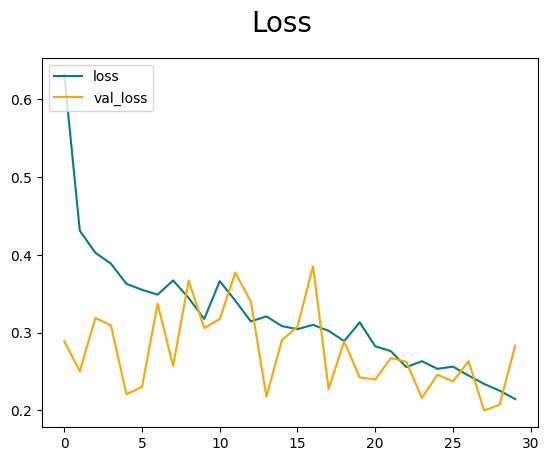

In [58]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle("Loss", fontsize=20)
plt.legend(loc='upper left')
plt.show()

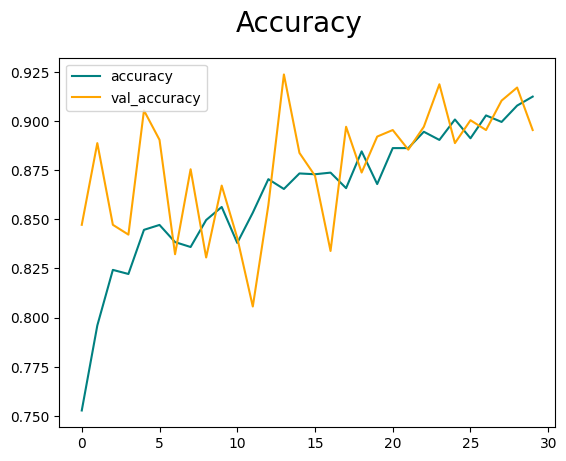

In [56]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc='upper left')
plt.show()